In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

import warnings


In [2]:
titers= pd.read_csv('Pooled Mouse IgG titers.csv', index_col=False)

In [3]:
titers.head()

,Study,IN Nano,Unnamed: 2,SC Nano,Unnamed: 4,IM IIAV,Unnamed: 6,Naïve,Unnamed: 8
0,D35 H3N2 NP,400,400,6400,12800,1.0,1.0,1,1
1,D35 H3N2 NP,400,200,1600,1600,1.0,1.0,1,1
2,D35 H3N2 NP,400,400,800,800,1.0,1.0,1,1
3,D35 H3N2 NP,200,1,400,1,1.0,1.0,1,1
4,D35 H3N2 NP,1,200,800,3200,1.0,1.0,1,1


In [4]:
titers.isnull().sum()

Study         0
IN Nano       0
Unnamed: 2    0
SC Nano       0
Unnamed: 4    0
IM IIAV       8
Unnamed: 6    8
Naïve         0
Unnamed: 8    0
dtype: int64

In [5]:
titers=titers.rename(columns={'Unnamed: 2': 'IN Nano 2', 'Unnamed: 4': 'SC Nano 2', 'Unnamed: 6': 'IM IIAV 2', 'Unnamed: 8': 'Naive 2'})

In [6]:
titers.head()

,Study,IN Nano,IN Nano 2,SC Nano,SC Nano 2,IM IIAV,IM IIAV 2,Naïve,Naive 2
0,D35 H3N2 NP,400,400,6400,12800,1.0,1.0,1,1
1,D35 H3N2 NP,400,200,1600,1600,1.0,1.0,1,1
2,D35 H3N2 NP,400,400,800,800,1.0,1.0,1,1
3,D35 H3N2 NP,200,1,400,1,1.0,1.0,1,1
4,D35 H3N2 NP,1,200,800,3200,1.0,1.0,1,1


In [7]:
titers.isnull().sum()

Study        0
IN Nano      0
IN Nano 2    0
SC Nano      0
SC Nano 2    0
IM IIAV      8
IM IIAV 2    8
Naïve        0
Naive 2      0
dtype: int64

In [8]:
INNano=(titers['IN Nano']+titers['IN Nano 2'])/2
SCNano=(titers['SC Nano']+titers['SC Nano 2'])/2
IMIIAV=(titers['IM IIAV']+titers['IM IIAV 2'])/2
Naive=(titers['Naïve']+titers['Naive 2'])/2
study=titers['Study']

d={'Study':study,'IN Nano':INNano, 'SC Nano':SCNano, 'IM IIAV':IMIIAV, 'Naive':Naive}
titeravg=pd.DataFrame(d)

In [9]:
titeravg

,Study,IN Nano,SC Nano,IM IIAV,Naive
0,D35 H3N2 NP,400.0,9600.0,1.0,1.0
1,D35 H3N2 NP,300.0,1600.0,1.0,1.0
2,D35 H3N2 NP,400.0,800.0,1.0,1.0
3,D35 H3N2 NP,100.5,200.5,1.0,1.0
4,D35 H3N2 NP,100.5,2000.0,1.0,1.0
...,...,...,...,...,...
155,D14 H3N8 HA,1200.0,1.0,1.0,1.0
156,D14 H3N8 HA,2400.0,800.0,1.0,1.0
157,D14 H3N8 HA,200.0,800.0,1.0,1.0
158,D14 H3N8 HA,200.0,800.0,1.0,1.0


In [10]:
one_hot = pd.get_dummies(titeravg['Study'])
# Drop column B as it is now encoded
titeravg = titeravg.drop('Study',axis = 1)
# Join the encoded df
titeravg = titeravg.join(one_hot)
titeravg

,IN Nano,SC Nano,IM IIAV,Naive,D14 H3N2 NP,D14 H3N8 HA,D35 H3N2 NP,D35 H3N8 HA
0,400.0,9600.0,1.0,1.0,False,False,True,False
1,300.0,1600.0,1.0,1.0,False,False,True,False
2,400.0,800.0,1.0,1.0,False,False,True,False
3,100.5,200.5,1.0,1.0,False,False,True,False
4,100.5,2000.0,1.0,1.0,False,False,True,False
...,...,...,...,...,...,...,...,...
155,1200.0,1.0,1.0,1.0,False,True,False,False
156,2400.0,800.0,1.0,1.0,False,True,False,False
157,200.0,800.0,1.0,1.0,False,True,False,False
158,200.0,800.0,1.0,1.0,False,True,False,False


In [11]:
titeravg=titeravg.rename(columns={'D14 H3N2 NP': 'D14_H3N2_NP', 'D14 H3N8 HA':'D14_H3N8_HA', 'D35 H3N2 NP': 'D35_H3N2_NP', 'D35 H3N8 HA': 'D35_H3N8_HA'})

titeravg.D14_H3N2_NP = titeravg.D14_H3N2_NP.replace(False, 0).astype(int)
titeravg.D14_H3N2_NP = titeravg.D14_H3N2_NP.replace(True, 1).astype(int)
titeravg.D14_H3N8_HA = titeravg.D14_H3N8_HA.replace(False, 0).astype(int)
titeravg.D14_H3N8_HA = titeravg.D14_H3N8_HA.replace(True, 1).astype(int)
titeravg.D35_H3N2_NP = titeravg.D35_H3N2_NP.replace(False, 0).astype(int)
titeravg.D35_H3N2_NP = titeravg.D35_H3N2_NP.replace(True, 1).astype(int)
titeravg.D35_H3N8_HA = titeravg.D35_H3N8_HA.replace(False, 0).astype(int)
titeravg.D35_H3N8_HA = titeravg.D35_H3N8_HA.replace(True, 1).astype(int)

# Mapping column names to integers
column_mapping = {
    'D14_H3N2_NP': 1,
    'D14_H3N8_HA': 2,
    'D35_H3N2_NP': 3,
    'D35_H3N8_HA': 4
}

# Assigning additional column based on the column that says True with an integer
titeravg['Day Numeric ID'] = (titeravg.iloc[:, -4:] == True).idxmax(axis=1).map(column_mapping)


titeravg

,IN Nano,SC Nano,IM IIAV,Naive,D14_H3N2_NP,D14_H3N8_HA,D35_H3N2_NP,D35_H3N8_HA,Day Numeric ID
0,400.0,9600.0,1.0,1.0,0,0,1,0,3
1,300.0,1600.0,1.0,1.0,0,0,1,0,3
2,400.0,800.0,1.0,1.0,0,0,1,0,3
3,100.5,200.5,1.0,1.0,0,0,1,0,3
4,100.5,2000.0,1.0,1.0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...
155,1200.0,1.0,1.0,1.0,0,1,0,0,2
156,2400.0,800.0,1.0,1.0,0,1,0,0,2
157,200.0,800.0,1.0,1.0,0,1,0,0,2
158,200.0,800.0,1.0,1.0,0,1,0,0,2


In [12]:
titeravg.isnull().sum()

IN Nano           0
SC Nano           0
IM IIAV           8
Naive             0
D14_H3N2_NP       0
D14_H3N8_HA       0
D35_H3N2_NP       0
D35_H3N8_HA       0
Day Numeric ID    0
dtype: int64

In [13]:
titeravg.fillna(method = 'ffill', inplace = True)
titeravg.isnull().sum()

/var/folders/m7/wg7pzks55_51ddph2435zsf40000gn/T/ipykernel_80624/2712817915.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titeravg.fillna(method = 'ffill', inplace = True)


IN Nano           0
SC Nano           0
IM IIAV           0
Naive             0
D14_H3N2_NP       0
D14_H3N8_HA       0
D35_H3N2_NP       0
D35_H3N8_HA       0
Day Numeric ID    0
dtype: int64

<Axes: >

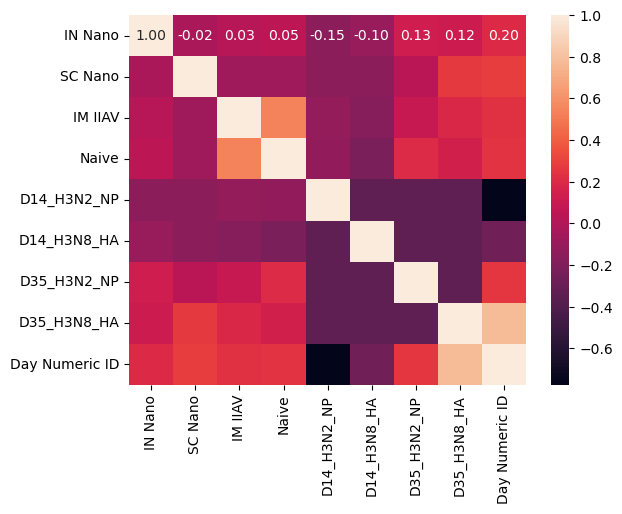

In [29]:
sns.heatmap(titeravg.corr(), annot = True, fmt=".2f")

In [16]:
X = titeravg[['IN Nano','SC Nano','IM IIAV','Naive']].to_numpy()
Y= titeravg[['Day Numeric ID']].to_numpy()


x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2, train_size=.8, random_state=42)


print(x_train, x_test, y_train, y_test)

[[1.0000e+00 9.6000e+03 1.0000e+00 1.0000e+00]
 [1.0000e+00 4.0050e+02 1.0050e+02 1.0000e+00]
 [4.0000e+02 8.0000e+02 1.0000e+00 1.0000e+00]
 [1.6000e+03 6.0000e+02 1.0000e+00 1.0000e+00]
 [6.4000e+03 1.9200e+04 1.0000e+00 1.0000e+00]
 [1.2800e+04 5.1200e+04 1.0000e+00 1.0000e+00]
 [3.2000e+03 1.2800e+04 1.0000e+00 1.0000e+00]
 [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [2.0000e+02 1.2800e+04 2.0000e+02 1.0000e+00]
 [8.0000e+02 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 1.0000e+00 1.0050e+02 1.0000e+00]
 [3.2005e+03 1.0000e+00 1.0000e+00 1.0000e+00]
 [6.4000e+03 8.0000e+02 2.0000e+02 1.0050e+02]
 [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+02 2.0000e+02 1.0050e+02]
 [2.0000e+02 8.0000e+02 1.0000e+00 1.0000e+00]
 [2.0000e+02 1.0240e+05 1.0000e+00 1.0000e+00]
 [1.0000e+00 1.0050e+02 1.0000e+00 1.0000e+00]
 [2.0000e+02 1.0050e+02 1.0000e+00 1.0000e+00]
 [2.0000e+02 6.4000e+03 1.0000e+00 1.0000e+00]
 [1.0000e+00 

In [30]:
nb=GaussianNB()
nb.fit(x_train, y_train)
y_pred_NB = nb.predict(x_test)
print('Prediction',y_pred_NB)
#print('Actual Y', y_test)
print('Accuracy of NB', accuracy_score(y_test, y_pred_NB))
#print('Precision of NB', precision_score(y_test, y_pred_NB))
#print('Recall of the NB', recall_score(y_test, y_pred_NB))
#print('F1 of the NB', f1_score(y_test, y_pred_NB))

Prediction [1 2 2 4 1 3 1 3 2 2 3 2 2 3 4 3 2 3 2 1 3 4 2 1 3 3 2 3 2 1 2 4]
Accuracy of NB 0.46875


In [31]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_DT = dt.predict(x_test)
print('Predictions', y_pred_DT)
#print('Actual Y', y_test)
print('Accuracy of DT', accuracy_score(y_test, y_pred_DT))
#print('Precision of DT', precision_score(y_test, y_pred_DT))
#print('Recall of the DT', recall_score(y_test, y_pred_DT))
print('F1 of the DT', f1_score(y_test, y_pred_DT, average='macro'))

Predictions [3 2 1 3 1 2 3 3 2 2 3 1 2 4 3 3 2 2 1 3 4 3 4 3 3 1 1 3 2 1 2 4]
Accuracy of DT 0.625
F1 of the DT 0.6215909090909092


In [32]:
warnings.filterwarnings("ignore")
k_values=range(1,26)
knn_accuracies=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_accuracies.append(accuracy_score(y_test, knn.predict(x_test)))


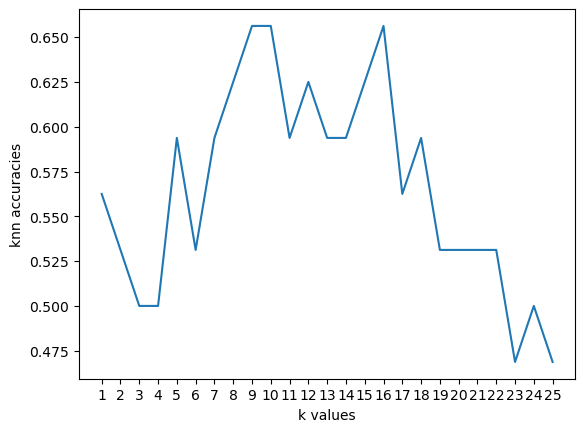

In [33]:
plt.plot(k_values, knn_accuracies)
plt.xticks(k_values)
plt.xlabel('k values')
plt.ylabel('knn accuracies')
plt.show()

In [34]:
knn_9=KNeighborsClassifier(n_neighbors=9)
knn_9.fit(x_train, y_train)
y_pred_knn9=knn_9.predict(x_test)
print('Predictions', y_pred_knn9)
print('Accuracy of KNN', accuracy_score(y_test, y_pred_knn9))
#print('Precision of KNN', precision_score(y_test, y_pred_knn8))
#print('Recall of the KNN', recall_score(Y_test, y_pred_knn8))
print('F1 of the KNN', f1_score(y_test, y_pred_knn9, average='macro'))

Predictions [1 1 1 4 1 4 3 4 2 2 3 1 2 4 3 4 1 2 1 3 2 4 3 3 3 2 1 3 2 1 2 2]
Accuracy of KNN 0.65625
F1 of the KNN 0.6423611111111112


In [35]:
print(classification_report(y_test,y_pred_knn9))

              precision    recall  f1-score   support

           1       0.78      0.78      0.78         9
           2       0.56      0.71      0.63         7
           3       0.75      0.60      0.67        10
           4       0.50      0.50      0.50         6

    accuracy                           0.66        32
   macro avg       0.65      0.65      0.64        32
weighted avg       0.67      0.66      0.66        32

